In [1]:
# Load modules

import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Set plotting parameters

%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='bright')
plt.style.use('../clint.mpl')

In [2]:
#Load predicted labels
with open('svm_labels.npy', 'rb') as dc_handle:
    svm_labels = np.load(dc_handle)

#Load data dict
with open('data_dict_test.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)
    
dwts_norm = data_dict['dwts_norm']

(26059, 256)


In [3]:
# Load all data into a dataframe, exluding waveforms

del data_dict['dwts_norm']
df_data = pd.DataFrame.from_dict(data_dict, orient='columns')
df_data

,wf_mins,wf_maxs,tp_0s,rt_10_50s,rt_10_90s,dt_effs,energies,channels,detectors,cc4s,hv_slots,strings
0,14966.0,15349.0,6896.0,0.0,0.0,498.639526,0,2,V08682B,A1,2,8
1,14977.0,15341.0,53824.0,0.0,0.0,-1231.914673,0,2,V08682B,A1,2,8
2,14947.0,15374.0,3968.0,0.0,0.0,472.853394,0,2,V08682B,A1,2,8
3,14903.0,15298.0,127248.0,0.0,0.0,NaN,0,2,V08682B,A1,2,8
4,15029.0,15336.0,95856.0,0.0,0.0,382.786285,0,2,V08682B,A1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
26054,14754.0,14949.0,117072.0,0.0,0.0,-162.112991,0,43,V07647B,F2,2,7
26055,14893.0,15062.0,121792.0,0.0,0.0,-669.265442,0,43,V07647B,F2,2,7
26056,14730.0,14873.0,92448.0,0.0,0.0,1368.581787,0,43,V07647B,F2,2,7
26057,14714.0,14882.0,88080.0,0.0,0.0,-2857.759766,0,43,V07647B,F2,2,7


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
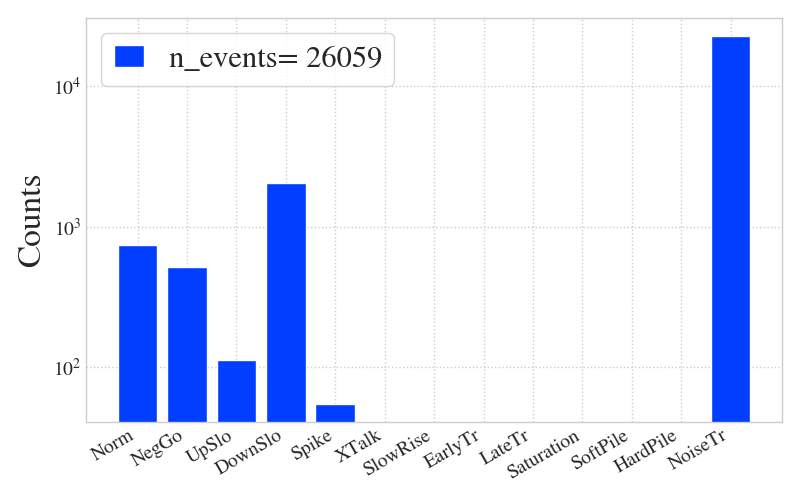

In [4]:
#Plot SVM classification statistics

n_bins = int(np.amax(svm_labels) + 1)
hist, bins = np.histogram(svm_labels, bins=n_bins)
categories = ['Norm', 'NegGo', 'UpSlo', 'DownSlo', 
              'Spike', 'XTalk', 'SlowRise', 'EarlyTr', 
              'LateTr', 'Saturation', 'SoftPile', 'HardPile', 'NoiseTr']

%matplotlib widget
plt.bar(categories, hist, label=f'n_events= {len(svm_labels)}')
plt.xticks(categories, rotation=30, ha='right')
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(fontsize=22)

In [9]:
# Perform desired category cuts 

tag = 0
tag_cut = (svm_labels == tag)
energy_cut = df_data['energies'][tag_cut]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
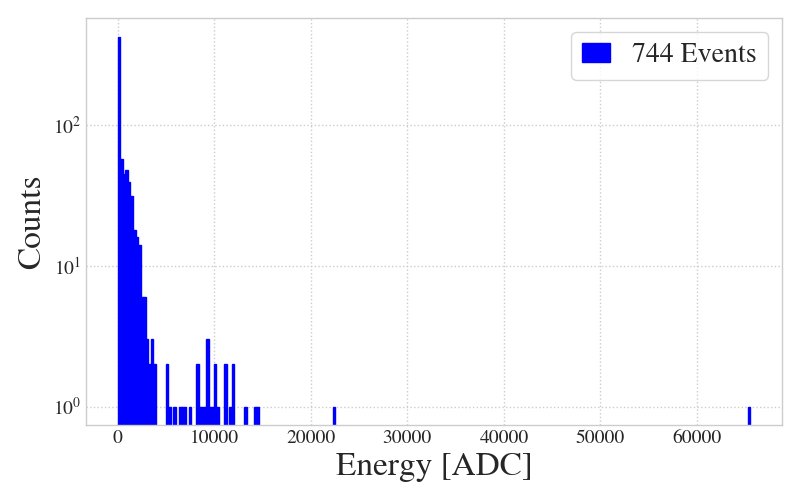

In [10]:
# Plot energy spectrum with category cut

%matplotlib widget
fig, ax = plt.subplots(1,1)
ax.hist(energy_cut, bins=250, label =f'{energy_cut.shape[0]} Events', color='blue', ec="blue")
plt.xlabel('Energy [ADC]', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(loc='best', fontsize=20, fancybox=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
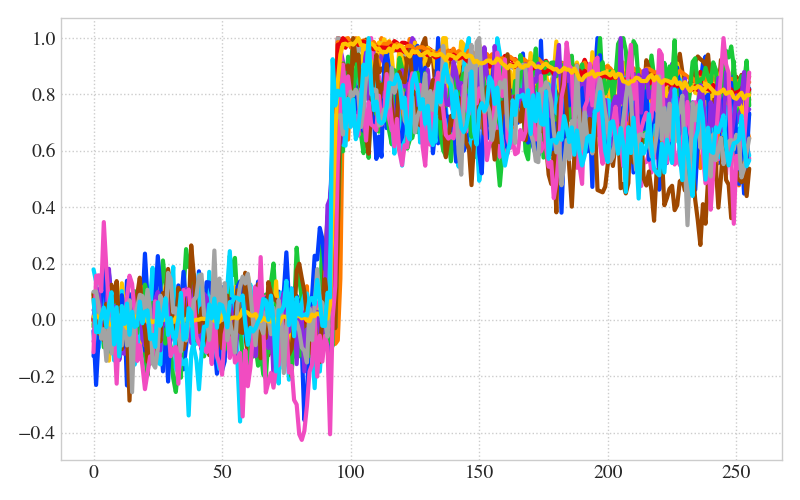

In [11]:
# Look at sample waveforms for category cut

samples = np.where(tag_cut)[0]

%matplotlib widget
for i in np.random.choice(samples, size=20, replace=False):
    plt.plot(dwts_norm[i,:]) 